# Environment test notebook

In [1]:
# Import python packages
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Check version numbers
print(f'numpy: {np.version.version}')
print(f'pandas: {pd.__version__}')
print(f'scipy: {sp.__version__}')
print(f'scikit-learn: {sk.__version__}')
print(f'seaborn: {sns.__version__}')

numpy: 2.3.2
pandas: 2.3.1
scipy: 1.16.1
scikit-learn: 1.7.1
seaborn: 0.13.2


In [2]:
!mkdir -p ~/.kaggle
!echo '{"username":"devanieceholmes","key":"fd1aac3187138a9e21c4b77580d5344d"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d bhanupratapbiswas/superstore-sales
!mv superstore-sales.zip ../data/
!unzip ../data/superstore-sales.zip -d ../data/


Dataset URL: https://www.kaggle.com/datasets/bhanupratapbiswas/superstore-sales
License(s): ODC Public Domain Dedication and Licence (PDDL)
  0%|                                                | 0.00/478k [00:00<?, ?B/s]
100%|█████████████████████████████████████████| 478k/478k [00:00<00:00, 813MB/s]
Archive:  ../data/superstore-sales.zip
  inflating: ../data/superstore_final_dataset (1).csv  


In [2]:
os.chdir("../data")
print(os.getcwd())

/workspaces/4Geeks_final_project/data


In [3]:
df = pd.read_csv("superstore_final_dataset (1).csv", encoding='latin1')

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], dayfirst=True, errors='coerce')


df['Order_Date'] = df['Order_Date'].astype("int64") / 1e9
df['Ship_Date'] = df['Ship_Date'].astype("int64") / 1e9

df["Turnaround_Time"] = df["Ship_Date"] - df["Order_Date"]

df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Turnaround_Time
0,1,CA-2017-152156,1.510099e+09,1.510358e+09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,259200.0
1,2,CA-2017-152156,1.510099e+09,1.510358e+09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,259200.0
2,3,CA-2017-138688,1.497226e+09,1.497571e+09,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,345600.0
3,4,US-2016-108966,1.476144e+09,1.476749e+09,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,604800.0
4,5,US-2016-108966,1.476144e+09,1.476749e+09,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,604800.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row_ID           9800 non-null   int64  
 1   Order_ID         9800 non-null   object 
 2   Order_Date       9800 non-null   float64
 3   Ship_Date        9800 non-null   float64
 4   Ship_Mode        9800 non-null   object 
 5   Customer_ID      9800 non-null   object 
 6   Customer_Name    9800 non-null   object 
 7   Segment          9800 non-null   object 
 8   Country          9800 non-null   object 
 9   City             9800 non-null   object 
 10  State            9800 non-null   object 
 11  Postal_Code      9789 non-null   float64
 12  Region           9800 non-null   object 
 13  Product_ID       9800 non-null   object 
 14  Category         9800 non-null   object 
 15  Sub_Category     9800 non-null   object 
 16  Product_Name     9800 non-null   object 
 17  Sales         

In [7]:
df_filtered = df.dropna(subset=['Postal_Code'], inplace= True)
df_filtered = df[df['Postal_Code'] > 0]
df_filtered = df[(df['Sales'] <= 1500)]

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9557 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row_ID           9557 non-null   int64  
 1   Order_ID         9557 non-null   object 
 2   Order_Date       9557 non-null   float64
 3   Ship_Date        9557 non-null   float64
 4   Ship_Mode        9557 non-null   object 
 5   Customer_ID      9557 non-null   object 
 6   Customer_Name    9557 non-null   object 
 7   Segment          9557 non-null   object 
 8   Country          9557 non-null   object 
 9   City             9557 non-null   object 
 10  State            9557 non-null   object 
 11  Postal_Code      9557 non-null   float64
 12  Region           9557 non-null   object 
 13  Product_ID       9557 non-null   object 
 14  Category         9557 non-null   object 
 15  Sub_Category     9557 non-null   object 
 16  Product_Name     9557 non-null   object 
 17  Sales            95

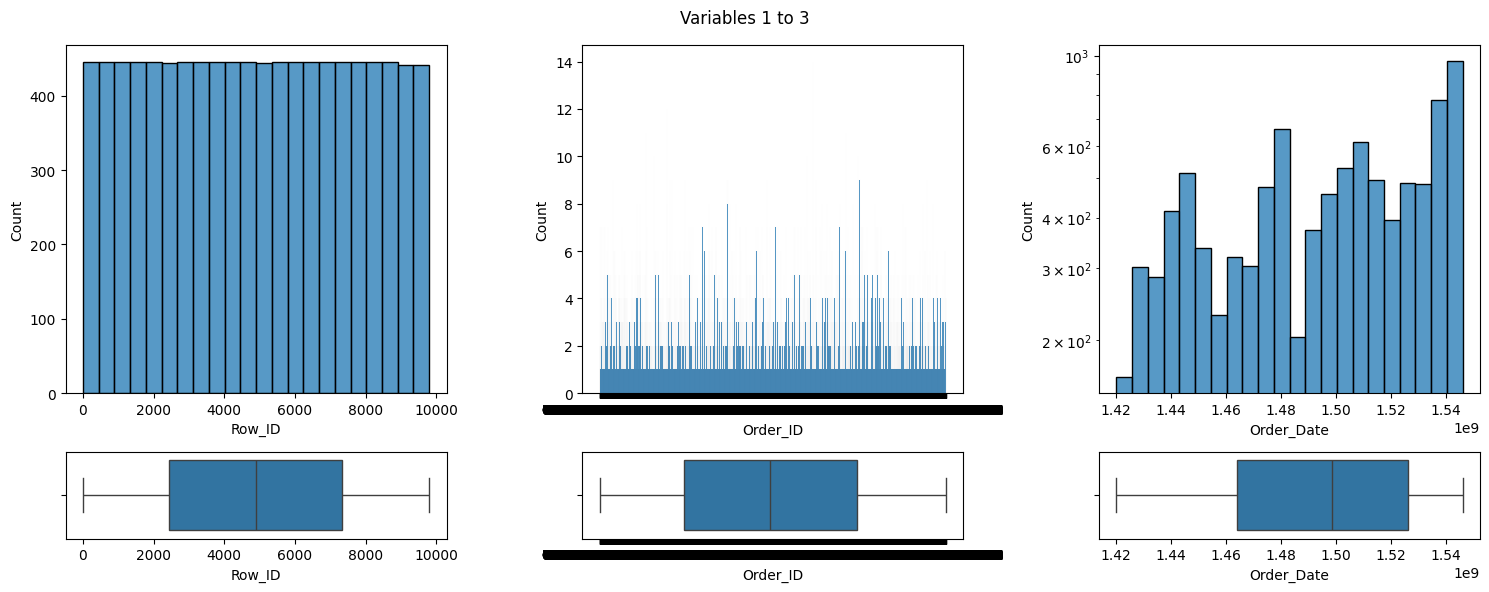

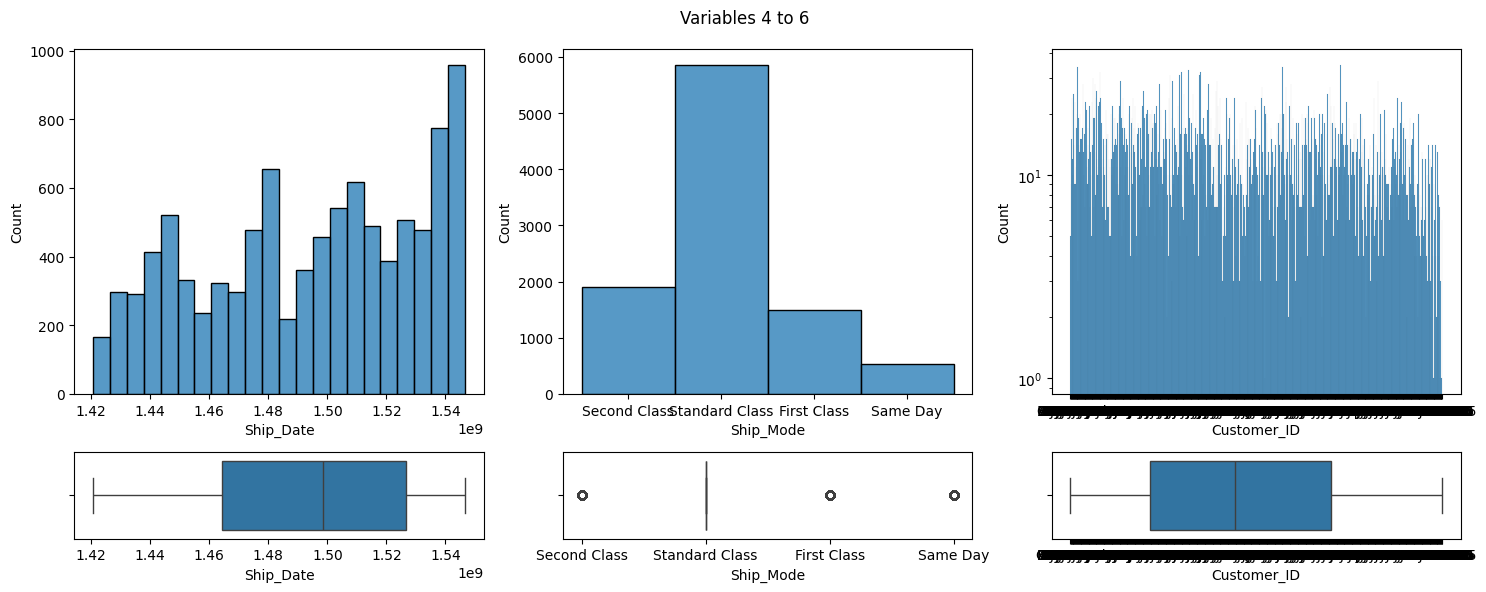

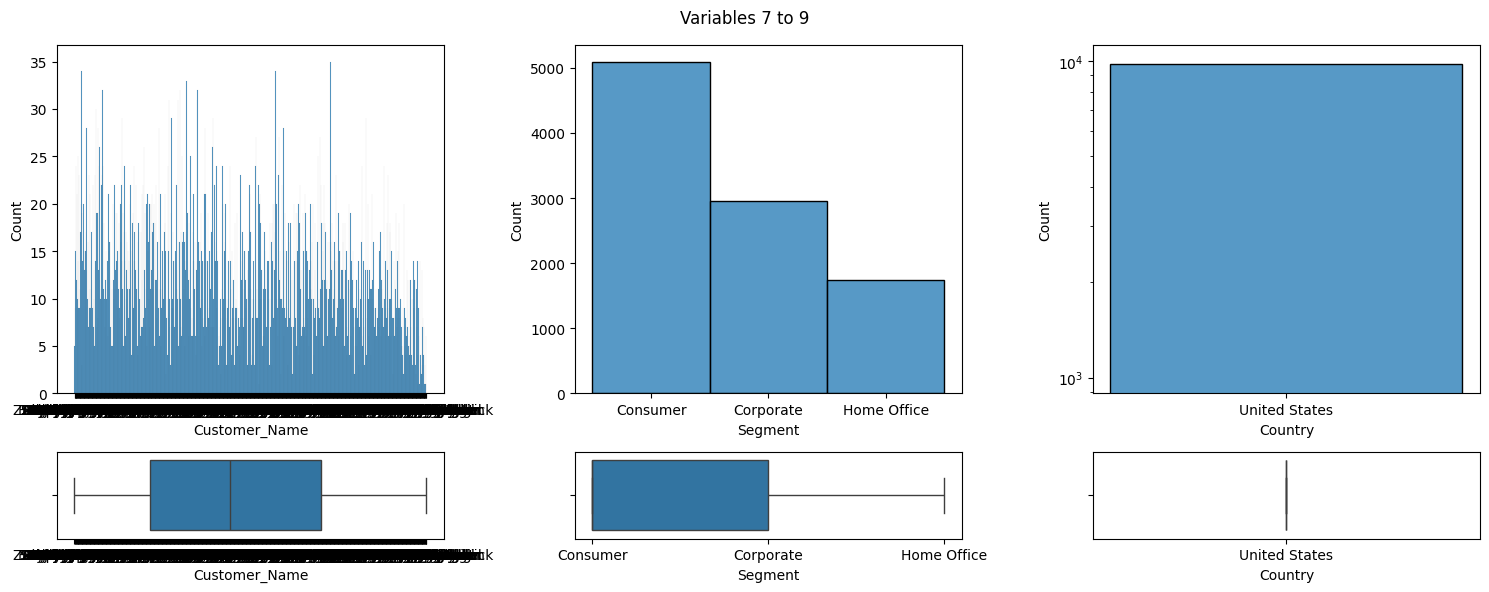

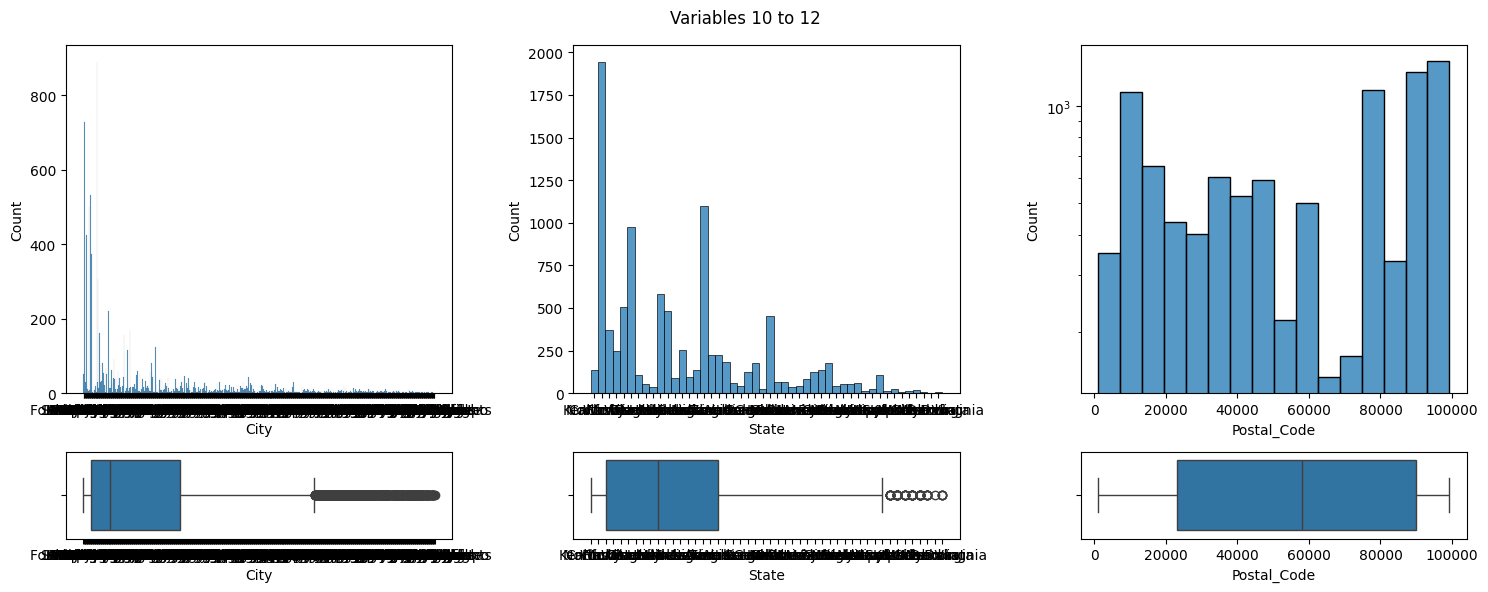

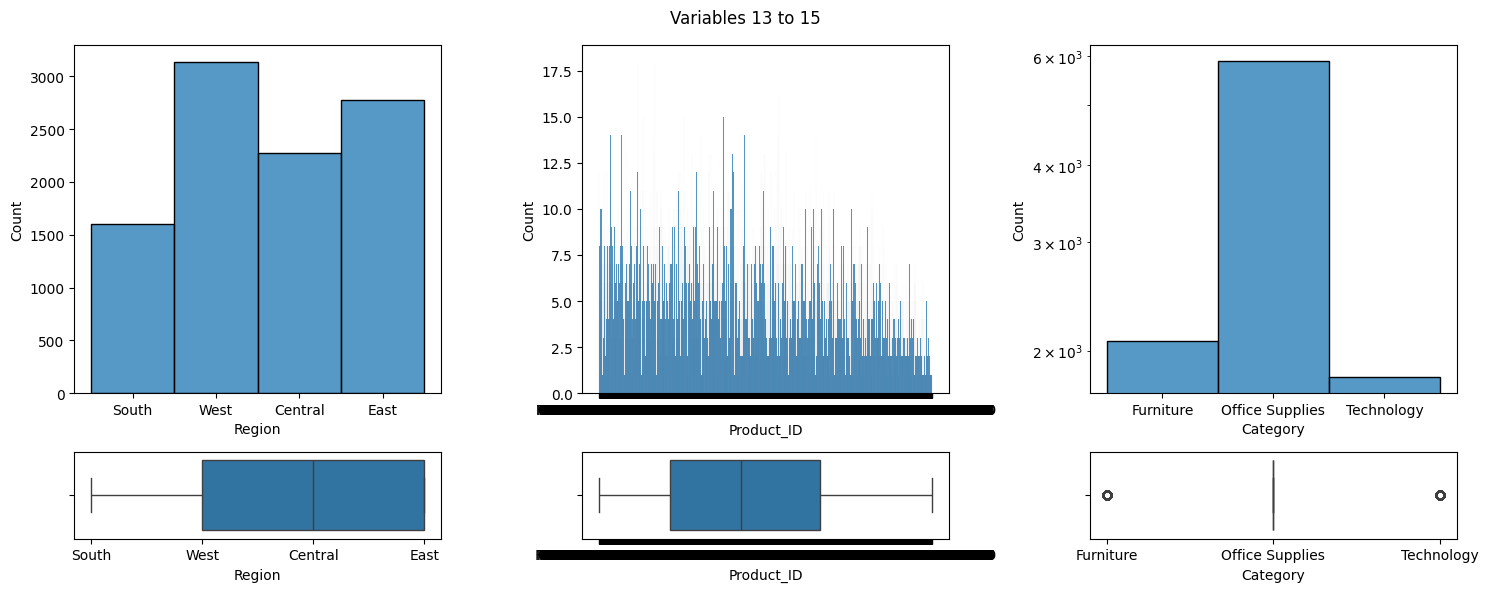

/tmp/ipykernel_7788/3321604772.py:19: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7788/3321604772.py:19: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


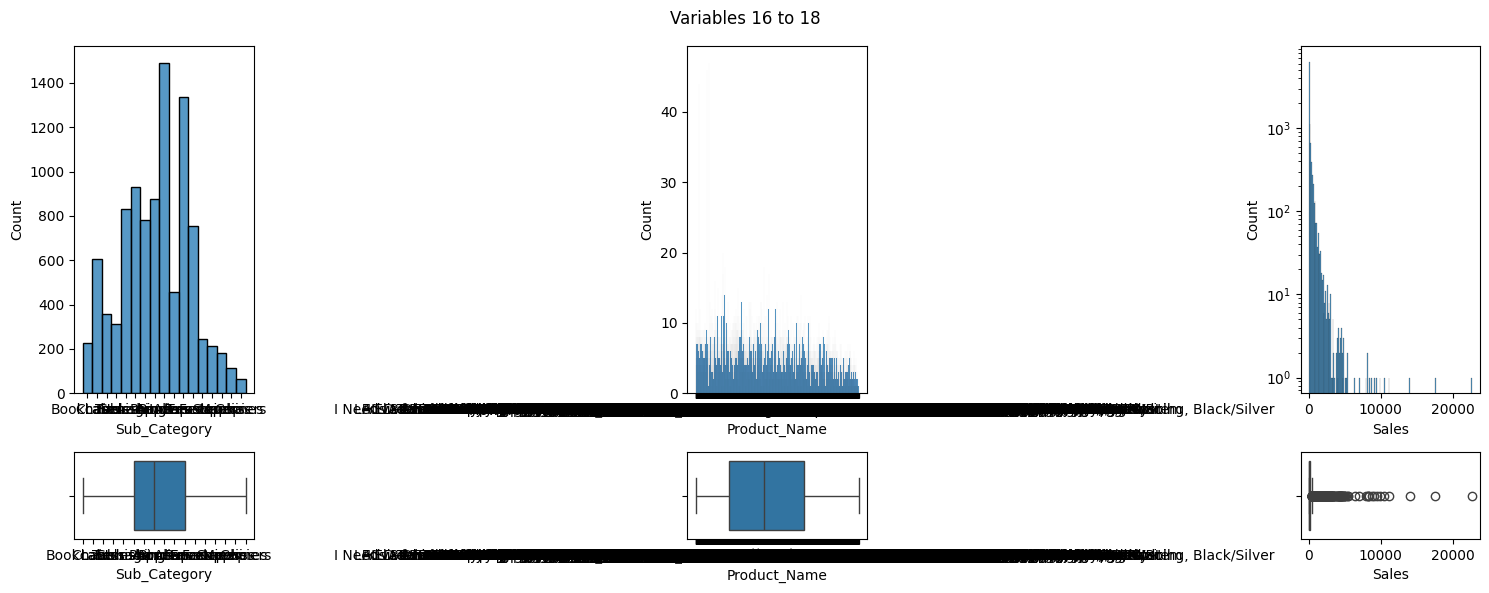

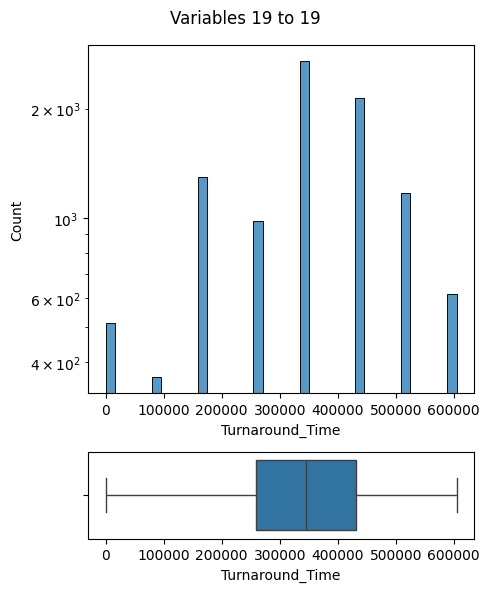

In [12]:
#analysis of univariate variables (categorical & numerical)
columns = df_filtered.columns
batch_size = 3

# Loop in batches of 4
for start in range(0, len(columns), batch_size):
    end = min(start + batch_size, len(columns))
    batch_cols = columns[start:end]

    fig, axis = plt.subplots(2, len(batch_cols), figsize=(5 * len(batch_cols), 6), 
                             gridspec_kw={"height_ratios": [4, 1]}, squeeze = False)

    for i, col in enumerate(batch_cols):
        plot = sns.histplot(ax=axis[0, i], data=df, x=col)
        sns.boxplot(ax=axis[1, i], data=df, x=col)

    plot.set_yscale('log')
    fig.suptitle(f"Variables {start + 1} to {end}")
    plt.tight_layout()
    plt.show()

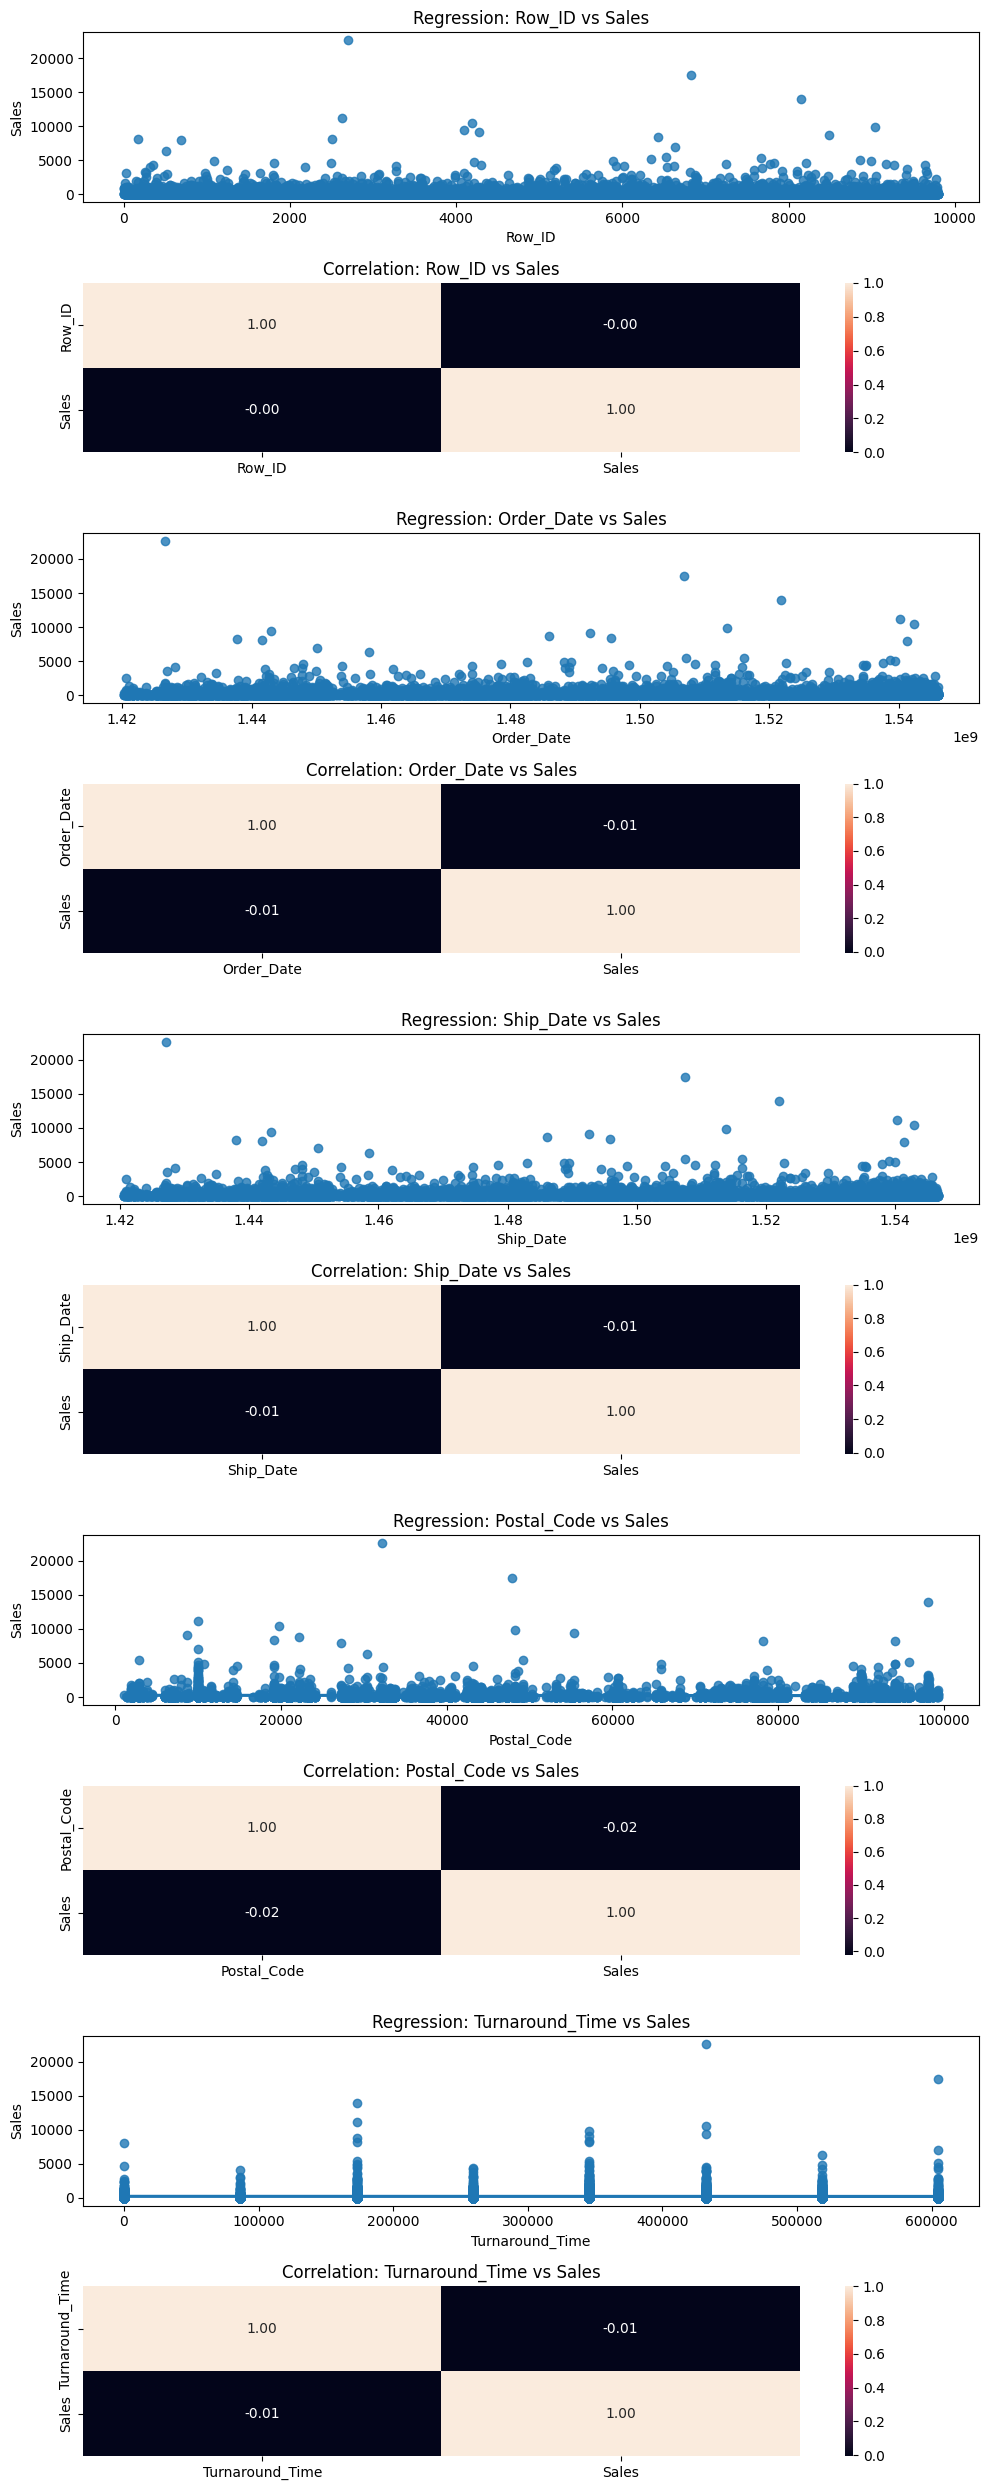

In [13]:
target = "Sales"

# Filter numeric columns except target
columns = [
    col for col in df_filtered.columns
    if col != target and pd.api.types.is_numeric_dtype(df[col])
]

batch_size = 5

# Loop in batches of 5 columns
for start in range(0, len(columns), batch_size):
    end = min(start + batch_size, len(columns))
    batch_cols = columns[start:end]

    fig, axis = plt.subplots(2 * len(batch_cols), 1, figsize=(10, 5 * len(batch_cols)))

    for i, col in enumerate(batch_cols):
        try:
            # Regression plot
            sns.regplot(ax=axis[2*i],data=df,x=col,y=target)
            axis[2*i].set_title(f"Regression: {col} vs {target}")

            # Correlation heatmap
            corr = df[[col, target]].corr()
            sns.heatmap(corr,annot=True,fmt=".2f", ax=axis[2*i + 1])
            axis[2*i + 1].set_title(f"Correlation: {col} vs {target}")

        except Exception as e:
            print(f"⚠️ Error plotting {col}: {e}")

    plt.tight_layout()
    plt.show()

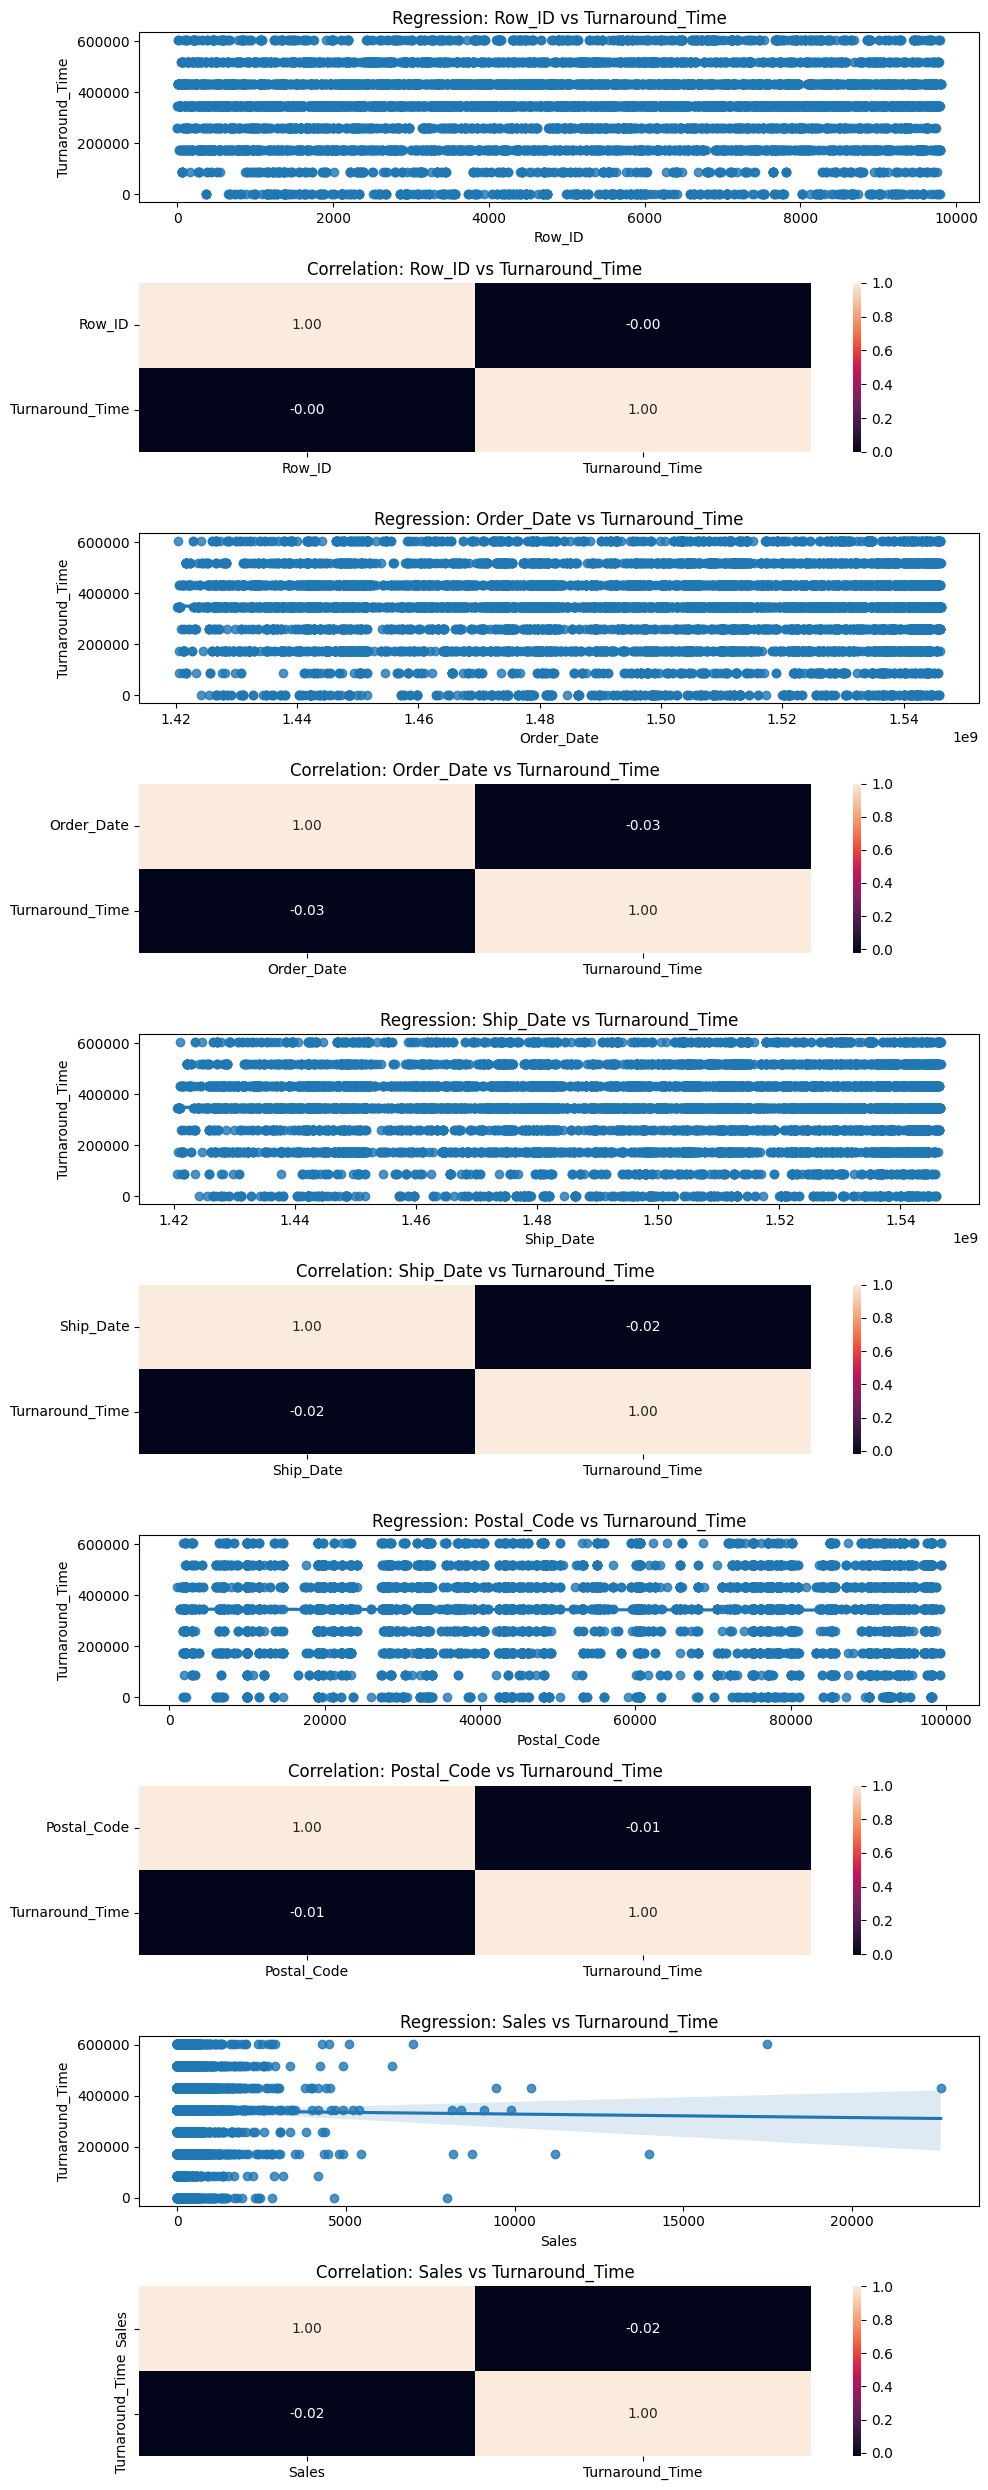

In [14]:
target = "Turnaround_Time"

# Filter numeric columns except target
columns = [
    col for col in df_filtered.columns
    if col != target and pd.api.types.is_numeric_dtype(df[col])
]

batch_size = 5

# Loop in batches of 5 columns
for start in range(0, len(columns), batch_size):
    end = min(start + batch_size, len(columns))
    batch_cols = columns[start:end]

    fig, axis = plt.subplots(2 * len(batch_cols), 1, figsize=(10, 5 * len(batch_cols)))

    for i, col in enumerate(batch_cols):
        try:
            # Regression plot
            sns.regplot(ax=axis[2*i],data=df,x=col,y=target)
            axis[2*i].set_title(f"Regression: {col} vs {target}")

            # Correlation heatmap
            corr = df_filtered[[col, target]].corr()
            sns.heatmap(corr,annot=True,fmt=".2f", ax=axis[2*i + 1])
            axis[2*i + 1].set_title(f"Correlation: {col} vs {target}")

        except Exception as e:
            print(f"⚠️ Error plotting {col}: {e}")

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_7788/49010067.py:30: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7788/49010067.py:30: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7788/49010067.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


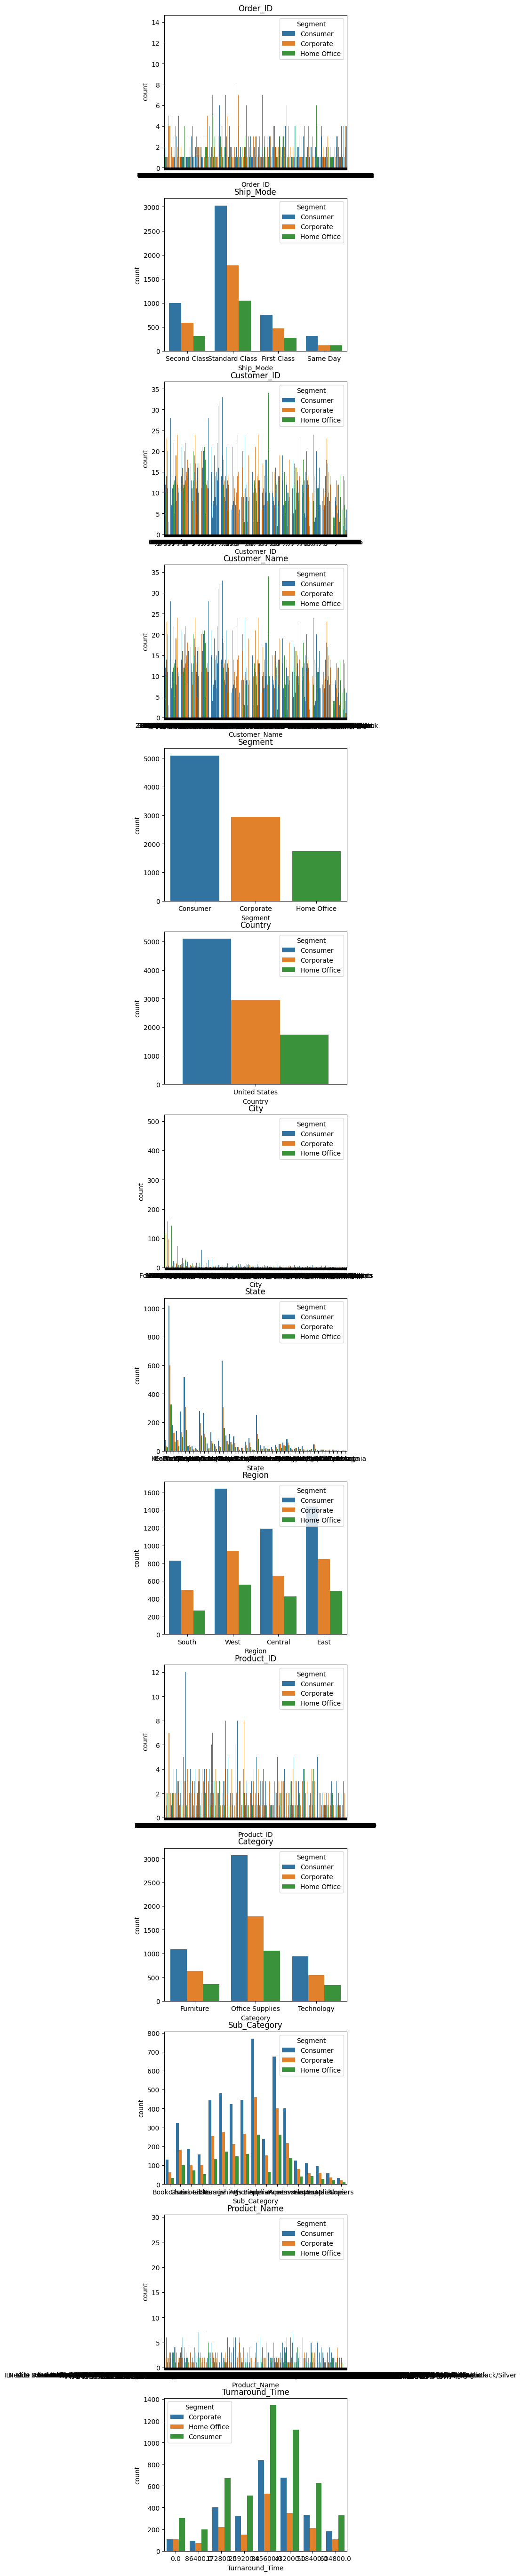

In [15]:

import math 

# List of categorical columns to plot
cols = [
    col for col in df_filtered.columns
    if df[col].dtype == 'object' or df[col].nunique() <= 10
]



# Calculate number of rows and columns for the subplot grid
n_cols = 1  # Set how many plots per row
n_rows = math.ceil(len(cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten in case it's a 2D array

# Loop through columns and plot
for i, col in enumerate(cols):
    sns.countplot(ax=axes[i], data=df, x=col, hue="Segment")
    axes[i].set_title(col)
    if i % n_cols != 0:
        axes[i].set_ylabel(None)

# Remove any extra subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

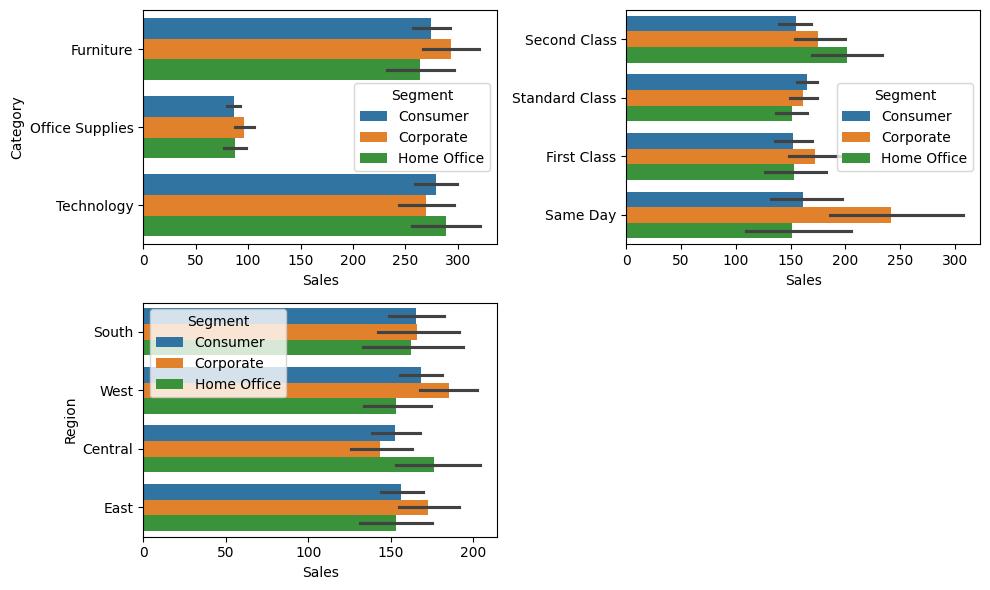

In [16]:
#multivariable 

fig, axis = plt.subplots(2, 2, figsize = (10, 6))

sns.barplot(ax = axis[0, 0], data = df_filtered, x = "Sales", y = "Category", hue = "Segment")
sns.barplot(ax = axis[0,1], data = df_filtered, x = "Sales", y = "Ship_Mode", hue = "Segment").set(ylabel = None)
sns.barplot(ax = axis[1,0], data = df_filtered, x = "Sales", y = "Region", hue = "Segment")
fig.delaxes(axis[1,1])

plt.tight_layout()

plt.show()

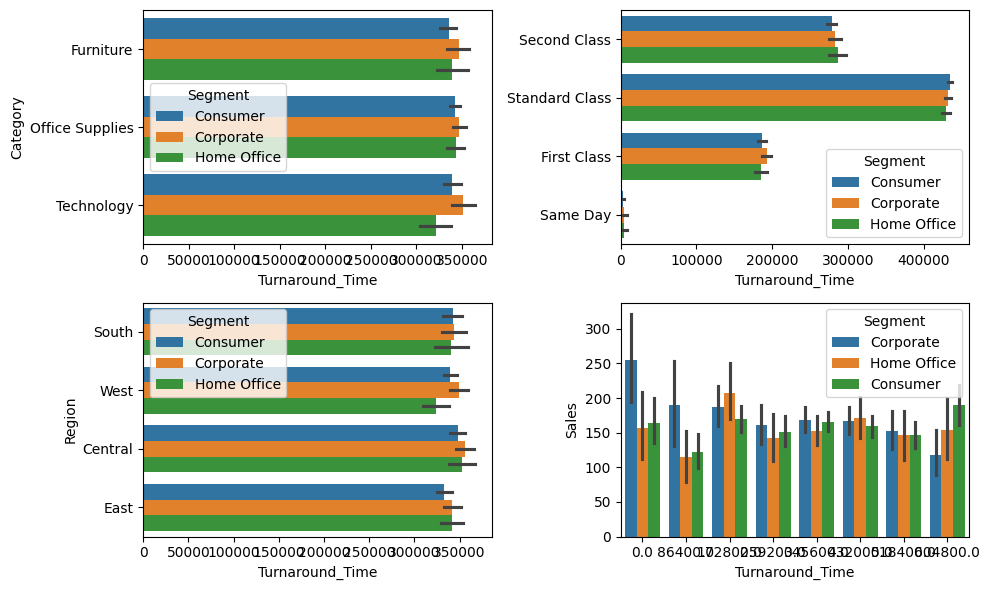

In [17]:
#multivariable 

fig, axis = plt.subplots(2, 2, figsize = (10, 6))

sns.barplot(ax = axis[0, 0], data = df_filtered, x = "Turnaround_Time", y = "Category", hue = "Segment")
sns.barplot(ax = axis[0,1], data = df_filtered, x = "Turnaround_Time", y = "Ship_Mode", hue = "Segment").set(ylabel = None)
sns.barplot(ax = axis[1,0], data = df_filtered, x = "Turnaround_Time", y = "Region", hue = "Segment")
sns.barplot(ax = axis[1,1], data = df_filtered, x = "Turnaround_Time", y = "Sales", hue = "Segment")

plt.tight_layout()

plt.show()

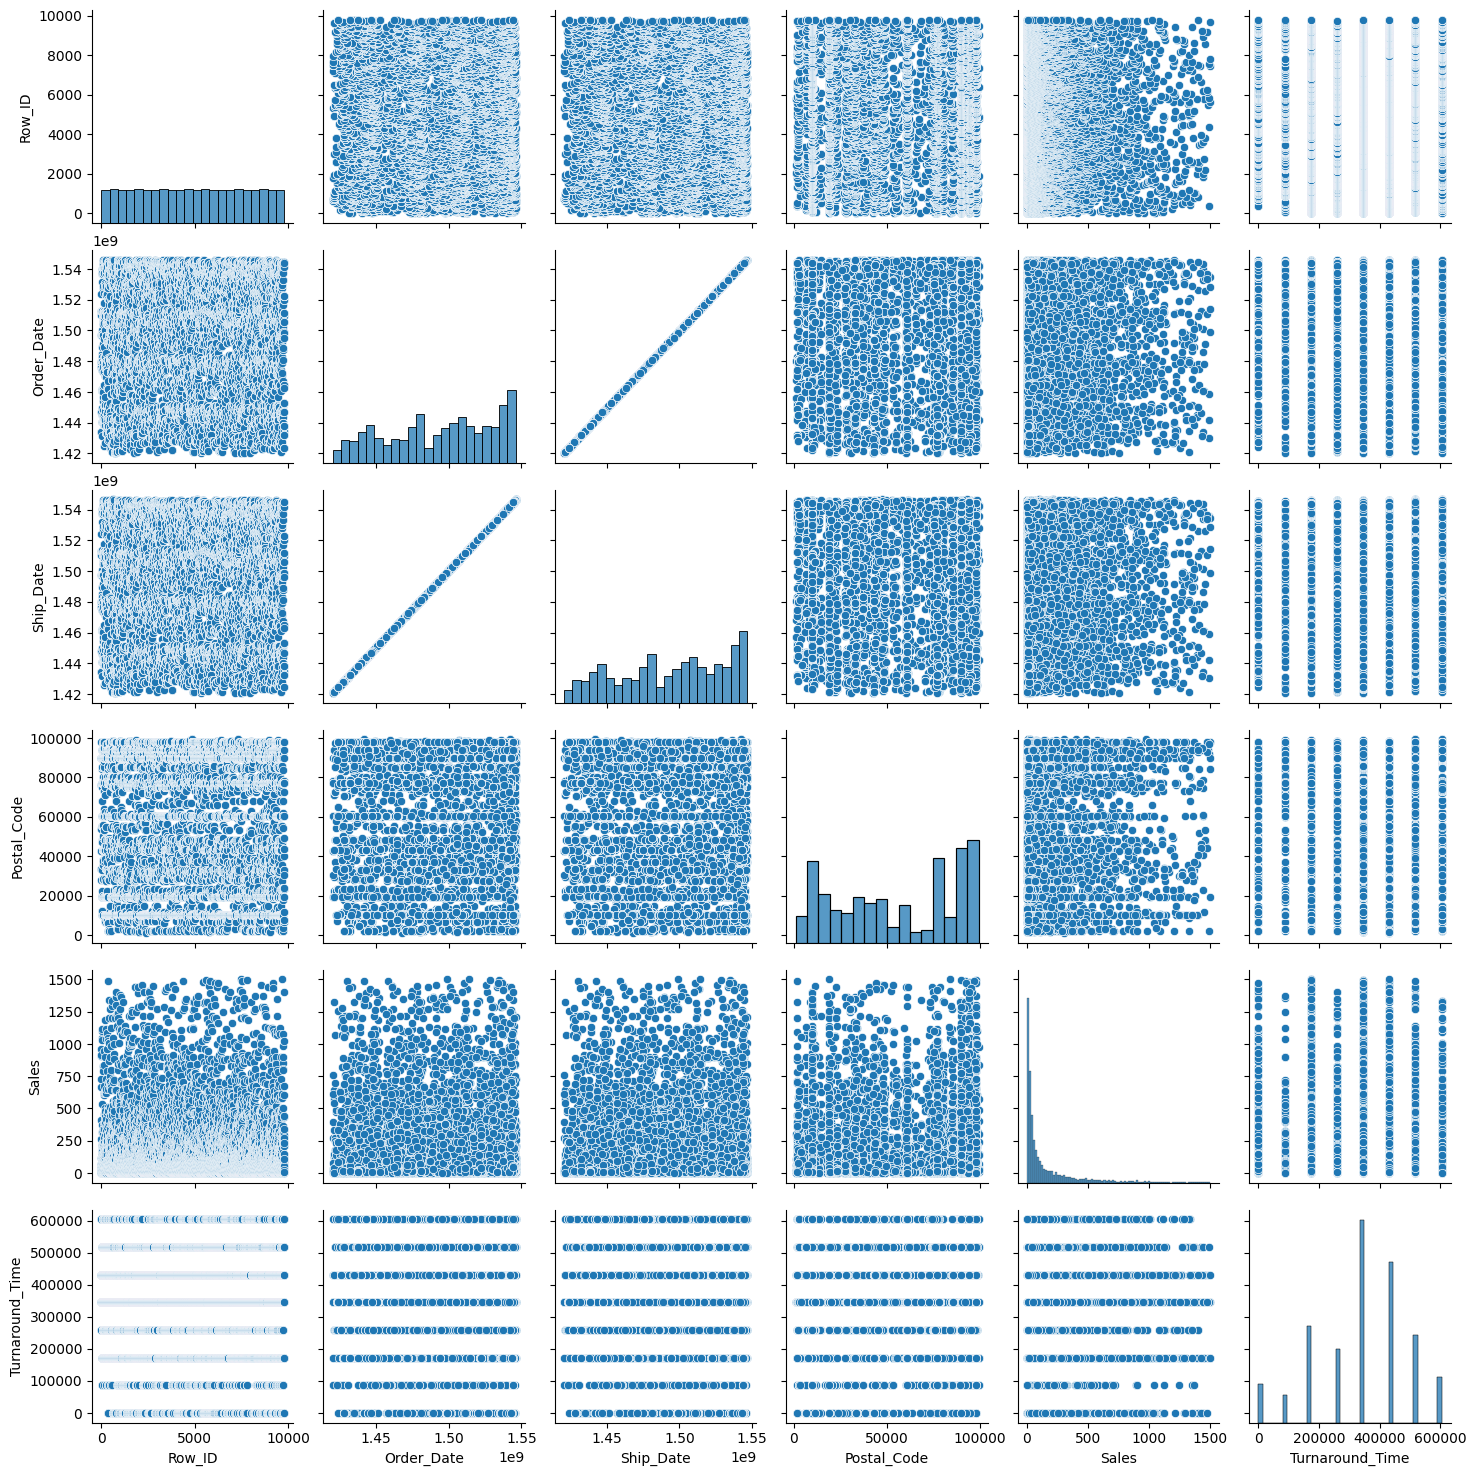

In [18]:
sns.pairplot(df_filtered)

/tmp/ipykernel_7788/1253869858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1[col + "_n"] = pd.factorize(df_filtered1[col])[0]
/tmp/ipykernel_7788/1253869858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1[col + "_n"] = pd.factorize(df_filtered1[col])[0]
/tmp/ipykernel_7788/1253869858.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

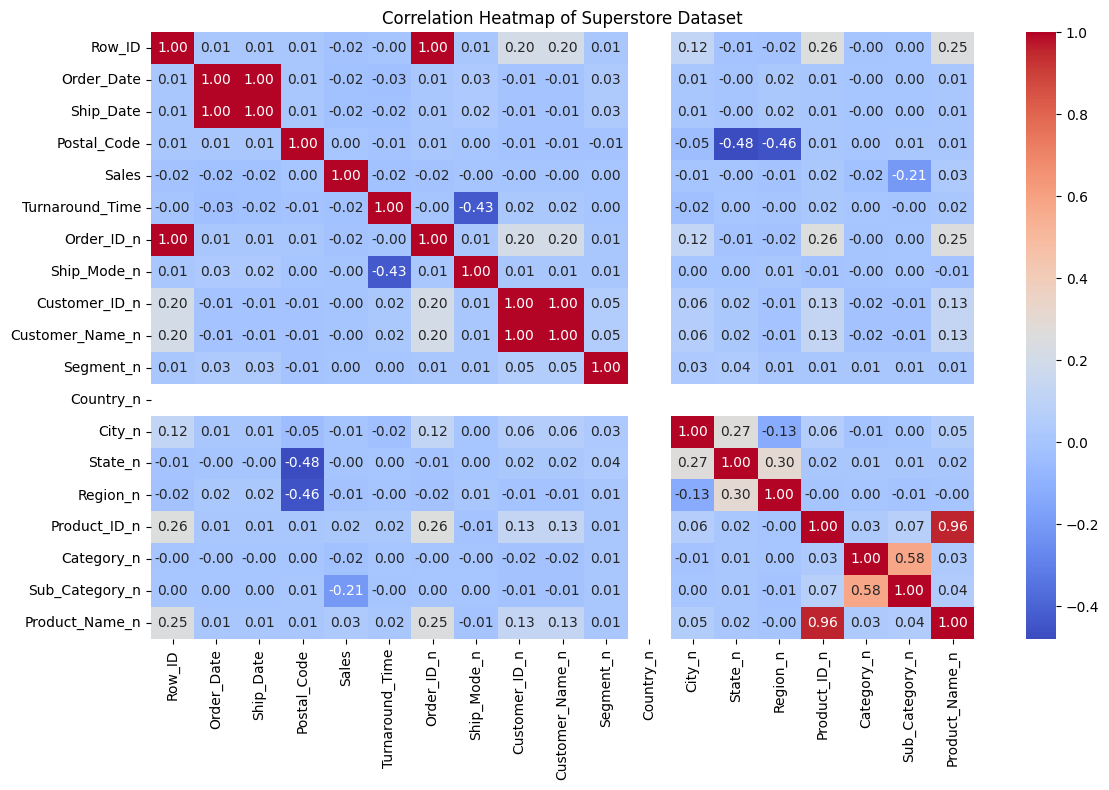

In [19]:
df_filtered1 = df_filtered

# Factorize all categorical columns
for col in df.select_dtypes(include=["object", "category"]).columns:
    df_filtered1[col + "_n"] = pd.factorize(df_filtered1[col])[0]

# Select only numeric columns
numeric_df = df_filtered1.select_dtypes(include=["number"])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Superstore Dataset")
plt.tight_layout()
plt.show()

In [9]:
df_filtered.describe()

,Row_ID,Order_Date,Ship_Date,Postal_Code,Sales,Turnaround_Time
count,9557.000000,9.557000e+03,9.557000e+03,9557.000000,9557.000000,9557.000000
mean,4893.497227,1.493578e+09,1.493920e+09,55392.818981,163.094448,342173.652820
std,2826.603871,3.635495e+07,3.635140e+07,32001.202080,255.088573,151232.855798
min,1.000000,1.420243e+09,1.420589e+09,1040.000000,0.444000,0.000000
25%,2443.000000,1.463962e+09,1.464307e+09,23320.000000,16.720000,259200.000000
50%,4888.000000,1.498435e+09,1.498694e+09,60016.000000,50.997000,345600.000000
75%,7340.000000,1.526342e+09,1.526688e+09,90008.000000,191.976000,432000.000000
max,9800.000000,1.546128e+09,1.546646e+09,99301.000000,1499.970000,604800.000000


In [10]:
df_filtered.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Turnaround_Time
0,1,CA-2017-152156,1.510099e+09,1.510358e+09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,259200.0
1,2,CA-2017-152156,1.510099e+09,1.510358e+09,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,259200.0
2,3,CA-2017-138688,1.497226e+09,1.497571e+09,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,345600.0
3,4,US-2016-108966,1.476144e+09,1.476749e+09,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,604800.0
4,5,US-2016-108966,1.476144e+09,1.476749e+09,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,604800.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import re

def preprocess_text(text):
    text = str(text).strip()
    
    text = re.sub(r"<.*?>", " ", text)
    
    text = re.sub(r"\s+", " ", text)
    
    # (keep / and - for dates and codes)
    text = re.sub(r"[^a-zA-Z0-9\s\-/]", "", text)
    
    # Lowercase for consistency
    text = text.lower().strip()
    
    return text

cols_to_clean = ["Order_Date", "Ship_Date","Ship_Mode", "Customer_Name", "Segment", 
                 "Country", "City", "State", "Region",
                 "Category", "Sub_Category"]

for col in cols_to_clean:
    df_filtered[col] = df_filtered[col].astype(str).apply(preprocess_text)

labeler = {}

for col in ['Customer_Name', 'City', 'State', 'Postal_Code']:
    le = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    df_filtered[f'{col}_encoded'] = le.fit_transform(df_filtered[[col]])
    labeler[col] = le  


#le = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
#df_filtered['Customer_Name_encoded'] = le.fit_transform(df_filtered[['Customer_Name']])
#df_filtered['City_encoded'] = le.fit_transform(df_filtered[['City']])
#df_filtered['State_encoded'] = le.fit_transform(df_filtered[['State']])
#df_filtered['Postal_Code_encoded'] = le.fit_transform(df_filtered[['Postal_Code']])

categorical_cols = ['Ship_Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub_Category']

for col in categorical_cols:

    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded = encoder.fit_transform(df_filtered[[col]])
    
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]))
    
    encoded_df.index = df_filtered.index
    
    df_filtered = pd.concat([df_filtered.drop(columns=[col]), encoded_df], axis=1)

# One-hot encode low-cardinality categorical columns
#df_filtered = pd.get_dummies(df_filtered, columns=['Ship_Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub_Category'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_filtered.head()

/tmp/ipykernel_861/4211919402.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered[col].astype(str).apply(preprocess_text)
/tmp/ipykernel_861/4211919402.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered[col].astype(str).apply(preprocess_text)
/tmp/ipykernel_861/4211919402.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Row_ID,Order_ID,Order_Date,Ship_Date,Customer_ID,Customer_Name,City,State,Postal_Code,Product_ID,Product_Name,Sales,Turnaround_Time,Customer_Name_encoded,City_encoded,State_encoded,Postal_Code_encoded,Ship_Mode_first class,Ship_Mode_same day,Ship_Mode_second class,Ship_Mode_standard class,Segment_consumer,Segment_corporate,Segment_home office,Country_united states,Region_central,Region_east,Region_south,Region_west,Category_furniture,Category_office supplies,Category_technology,Sub_Category_accessories,Sub_Category_appliances,Sub_Category_art,Sub_Category_binders,Sub_Category_bookcases,Sub_Category_chairs,Sub_Category_copiers,Sub_Category_envelopes,Sub_Category_fasteners,Sub_Category_furnishings,Sub_Category_labels,Sub_Category_machines,Sub_Category_paper,Sub_Category_phones,Sub_Category_storage,Sub_Category_supplies,Sub_Category_tables
0,1,CA-2017-152156,15100992000,15103584000,CG-12520,claire gute,henderson,kentucky,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,261.9600,259200.0,166.0,193.0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,CA-2017-152156,15100992000,15103584000,CG-12520,claire gute,henderson,kentucky,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,259200.0,166.0,193.0,15.0,215.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,CA-2017-138688,14972256000,14975712000,DV-13045,darrin van huff,los angeles,california,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,14.6200,345600.0,201.0,264.0,3.0,512.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,US-2016-108966,14761440000,14767488000,SO-20335,sean o donnel,fort lauderdale,florida,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,957.5775,604800.0,687.0,152.0,8.0,168.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,US-2016-108966,14761440000,14767488000,SO-20335,sean o donnel,fort lauderdale,florida,33311.0,OFF-ST-10000760,Eldon Fold N Roll Cart System,22.3680,604800.0,687.0,152.0,8.0,168.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
df_filtered = df_filtered.drop(columns=["Order_ID", "Customer_ID", "Product_ID","Customer_Name", "City", "State", "Postal_Code", "Ship_Date"]) 

In [14]:
df_filtered.to_csv("clean_superstore_dataset.csv2", index=False)

In [16]:
User_input = df_filtered.drop(columns=["Row_ID", "Order_Date","Customer_Name_encoded","City_encoded", "Segment_consumer", 
                                       "Segment_corporate","Segment_home office","Country_united states","Region_central","Region_east",
                                       "Region_south","Region_west", "Product_Name"])

In [17]:
User_input.to_csv("training_data")

In [18]:
os.chdir("../models")
print(os.getcwd())

/workspaces/4Geeks_final_project/models


In [ ]:
import pickle

for col, le in labeler.items():
    with open(f'{col}_encoder.pkl', 'wb') as f:
        pickle.dump(le, f)


In [ ]:
import pickle

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)